In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from clyngor import ASP, solve

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

frozenset({('assign', (8, 1, 6)), ('assign', (10, 5, 2)), ('assign', (2, 3, 5)), ('assign', (9, 2, 2)), ('assign', (8, 6, 1)), ('assign', (9, 3, 5)), ('employee', (9,)), ('employee', (6,)), ('assign', (10, 6, 4)), ('assign', (7, 5, 2)), ('assign', (9, 2, 4)), ('minNights', (1,)), ('assign', (6, 2, 1)), ('maxEmpAfternoon', (3,)), ('assign', (6, 1, 5)), ('shift', (5, '"rest"', 0)), ('assign', (5, 3, 1)), ('assign', (10, 3, 3)), ('maxEmpMorning', (4,)), ('assign', (9, 5, 3)), ('assign', (7, 2, 5)), ('day', (2,)), ('assign', (8, 2, 3)), ('assign', (5, 6, 2)), ('assign', (5, 6, 7)), ('assign', (3, 1, 5)), ('shift', (6, '"holiday"', 0)), ('shift', (3, '"night"', 10)), ('assign', (4, 6, 7)), ('assign', (7, 2, 6)), ('employee', (8,)), ('assign', (6, 6, 7)), ('maxEmpNight', (2,)), ('day', (1,)), ('assign', (4, 1, 1)), ('assign', (1, 2, 2)), ('day', (4,)), ('assign', (7, 1, 3)), ('maxDays', (3,)), ('assign', (2, 2, 3)), ('assign', (10, 2, 1)), ('assign', (4, 1, 3)), ('minHoursPerWeek', (24,)), (

/home/sunny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


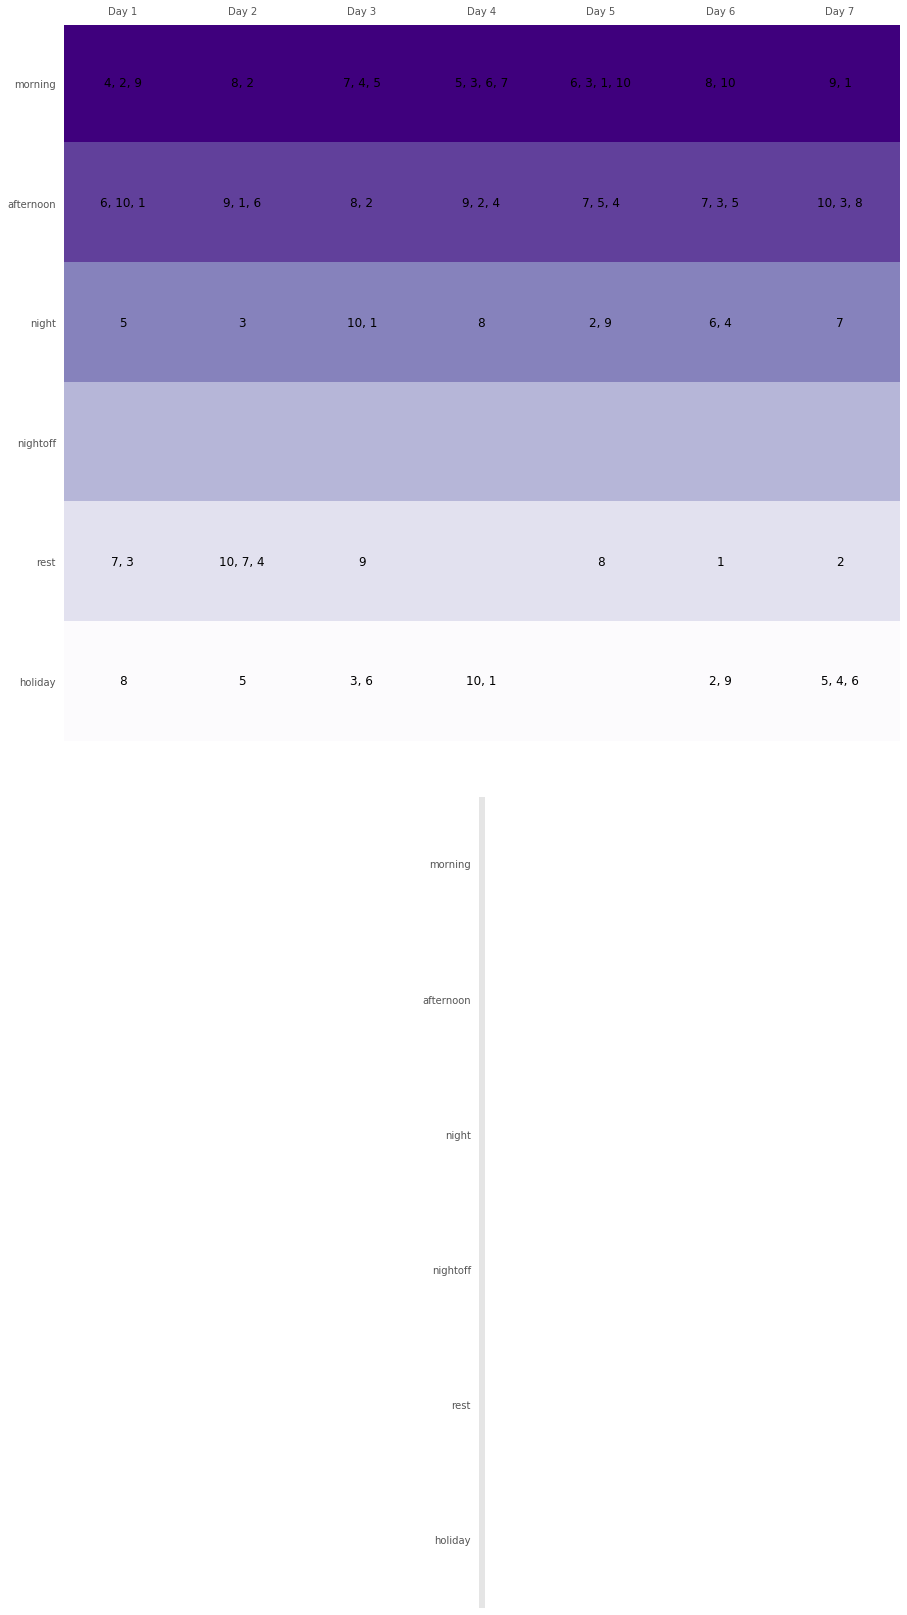

In [6]:
answers = solve('1week.lp')#, options=clasp_options)
for ans_idx, answer in enumerate(answers):
    print(answer)
    #with open('output.txt') as f:
    #all_entries = f.read().split(' ')

    all_entries = []
    for entry in answer:
        if entry[0] == 'assign':
            all_entries.append(entry)

    print('Number of Entries : ', len(all_entries))
    shift_mapping = {1:'morning', 2:'afternoon',3:'night', 4:'nightoff',5:'rest',6:'holiday'}

    final_dict = {}
    for entry in all_entries:
        #emp_id,shift_id, day_of_month = entry.split(',')
        emp_id,shift_id, day_of_month = entry[1]
        #emp_id, day_of_month = re.findall('[0-9]+',emp_id)[0], re.findall('[0-9]+',day_of_month)[0]
        emp_id,shift_id, day_of_month = int(emp_id), int(shift_id), int(day_of_month)
        if day_of_month not in final_dict:
            final_dict[day_of_month] = {'morning':[], 'afternoon':[], 'night':[], 'nightoff':[], 'rest':[], 'holiday':[]}
        #print(emp_id,shift_id, day_of_month)
        final_dict[day_of_month][shift_mapping[shift_id]].append(emp_id)

    df = pd.DataFrame(final_dict).loc[['morning','afternoon','night','nightoff','rest','holiday'],]
    df = df[sorted(df.columns)]
    df = df.astype('str')
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x.replace('[','').replace(']',''))
    df.to_excel('final_report_%d.xlsx'%(ans_idx+1))
    #df
    with plt.style.context(('seaborn', 'ggplot')):
        extras = max(df.columns) % 7
        num_of_figs = (max(df.columns) // 7) + 1 #if extras else (max(df.columns) // 7)
        plt.figure(figsize=(15,15*num_of_figs))
        for i  in range(num_of_figs):
            plt.subplot(num_of_figs, 1, i+1)

            if i != num_of_figs-1:
                sub_df = df[range(7*i+1, 7*(i+1)+1)]
                #print(list(range(7*i+1, 7*(i+1)+1)))
            else:
                sub_df = df[range(7*i+1, 7*i+1+extras)]
                #print(list(range(7*i+1, 7*i+1+extras)))
            values = np.ones((6,7)) if i != num_of_figs-1 else np.ones((6,extras))
            incr=1
            for l in range(6):
                values[l] = values[l] + incr
                incr = incr+0.1

            plt.imshow(values, cmap=plt.cm.Purples_r)
            days = ['Day %d'%i for i in range(1,8)]
            if i != num_of_figs-1:
                plt.xticks(range(7), ['Day %d'%m for m in range(7*i+1, 7*(i+1)+1)]);
            else:
                plt.xticks(range(extras), ['Day %d'%n for n in range(7*i+1, 7*i+1+extras)]);
            plt.yticks(range(6), ['morning','afternoon','night','nightoff','rest','holiday']);
            for j in range(6):
                if i != num_of_figs-1:
                    for k in range(7):
                        plt.text(k,j, str(sub_df.values[j,k]), horizontalalignment='center', verticalalignment='center',
                             fontdict=dict(color='black'), fontsize=12)
                else:
                    #print(sub_df)
                    for k in range(extras):
                        plt.text(k,j, str(sub_df.values[j,k]), horizontalalignment='center', verticalalignment='center',
                             fontdict=dict(color='black'), fontsize=12)
                                 #bbox=dict(facecolor='orange', alpha=0.6))

            plt.grid()

    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    #plt.savefig('vis_%d.png'%(ans_idx+1))
    break